# Exploring Extrasolar Planets with ML Approach

### We are going to create a classification model that will help us to identify a better candidate for a earth like habitable planet using Kepler Mission Data.

#### Read About Kepler Mission [here.](https://www.nasa.gov/mission_pages/kepler/overview/index.html)
#### Read About Exoplanets [here.](https://exoplanets.nasa.gov/what-is-an-exoplanet/planet-types/overview/)


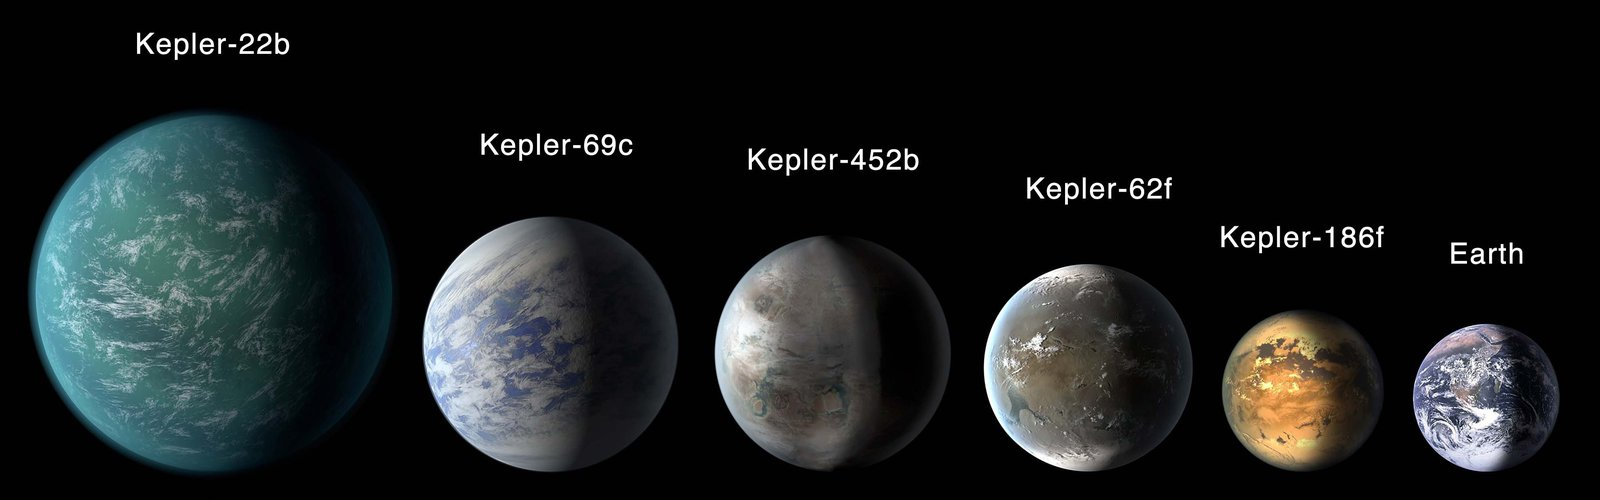

### Importing all the basic library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the Kepler DataSet

In [2]:
df = pd.read_csv('exoplanet-data.csv')

In [3]:
#Display all the rows and columns upto 100 observation
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [4]:
# Printing the shape of the train and test dataset

print(df.shape)
print('The shape of train data is: Row {} columns {}'.format(df.shape[0],df.shape[1]))

(9564, 50)
The shape of train data is: Row 9564 columns 50


In [5]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


- The Kepler space telescope is a retired space telescope launched by NASA in 2009 to discover Earth-size planets orbiting other stars. We can download the data recorded by Kepler from Exoplanet Archive. The NASA Exoplanet Archive is an online astronomical exoplanet and stellar catalog. Kepler Identifies the KOI (Kepler Object of Interest and made a comprehensive analysis to disposition them into planet candidates and false positives.



### Let us rename the features for a better understanding.
### we can see the column description [here.](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'Exoplanet_Archive_Disposition',
'koi_pdisposition':'Disposition_Using_KeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit_LikeFPFlag',
'koi_fpflag_ss':'StellarEclipse_FP_Flag',
'koi_fpflag_co':'CentroidOffsetFPFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFPFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpper_days',
'koi_period_err2':'OrbitalPeriodLower_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpoch_Lower',
'koi_time0bk_err2':'TransitEpoch_Upper',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameter_Lower',
'koi_impact_err2':'ImpactParameter_Upper',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDuration_Lower',
'koi_duration_err2':'TransitDuration_Upper',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepth_Lower',
'koi_depth_err2':'TransitDepth_Upper',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadius_Lower',
'koi_prad_err2':'PlanetaryRadius_Upper',
'koi_teq':'EquilibriumTemperature_K',
'koi_teq_err1':'EquilibriumTemperature_Lower',
'koi_teq_err2':'EquilibriumTemperature_Upper',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFlux_Lower',
'koi_insol_err2':'InsolationFlux_Upper',
'koi_model_snr':'TransitSignal_to_Noise',
'koi_tce_plnt_num':'TCE_PlanetNumber',
'koi_tce_delivname':'TCE_DeliverName',
'koi_steff':'StellarEffectiveTemperature_K',
'koi_steff_err1':'StellarEffectiveTemp_Lower',
'koi_steff_err2':'StellarEffectiveTemp_Upper',
'koi_slogg':'StellarSurfaceGravity',
'koi_slogg_err1':'Stellar_SurfaceGravity_Lower',
'koi_slogg_err2':'Stellar_SurfaceGravity_Upper',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadius_Lower',
'koi_srad_err2':'StellarRadius_Upper',
'ra':'RA_deg',
'dec':'Dec_deg',
'koi_kepmag':'Kepler_band[mag]'
})

In [7]:
df.head()

,rowid,KepID,KOIName,KeplerName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,EquilibriumTemperature_Lower,EquilibriumTemperature_Upper,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,TCE_DeliverName,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag]
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rowid                                       9564 non-null   int64  
 1   KepID                                       9564 non-null   int64  
 2   KOIName                                     9564 non-null   object 
 3   KeplerName                                  2294 non-null   object 
 4   Exoplanet_Archive_Disposition               9564 non-null   object 
 5   Disposition_Using_KeplerData                9564 non-null   object 
 6   DispositionScore                            8054 non-null   float64
 7   NotTransit_LikeFPFlag                       9564 non-null   int64  
 8   StellarEclipse_FP_Flag                      9564 non-null   int64  
 9   CentroidOffsetFPFlag                        9564 non-null   int64  
 10  EphemerisMat

#### Comments:

- This info reflects that there are some null values and few are completely empty ('EquilibriumTemperature_err1','EquilibriumTemperature_err2') so we can just remove them. 
- And most of the features are numerical so let's first look the cate gorical features in breif.

### Handling Missing Values

In [9]:
#Checking for missing values

df.isnull().sum()

rowid                                            0
KepID                                            0
KOIName                                          0
KeplerName                                    7270
Exoplanet_Archive_Disposition                    0
Disposition_Using_KeplerData                     0
DispositionScore                              1510
NotTransit_LikeFPFlag                            0
StellarEclipse_FP_Flag                           0
CentroidOffsetFPFlag                             0
EphemerisMatchIndicatesContaminationFPFlag       0
OrbitalPeriod_days                               0
OrbitalPeriodUpper_days                        454
OrbitalPeriodLower_days                        454
TransitEpoch_BKJD                                0
TransitEpoch_Lower                             454
TransitEpoch_Upper                             454
ImpactParamete                                 363
ImpactParameter_Lower                          454
ImpactParameter_Upper          

#### Comments:

-   We can drop the features 'EquilibriumTemperature_err1','EquilibriumTemperature_err2','KeplerName' as most of the values are missing.
- we can impute other null values with mean.

In [10]:
df['TCE_DeliverName'].value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: TCE_DeliverName, dtype: int64

#### Comments:
- We can see that the column 'TCE_DeliverName' has almost all the values assigned to a single category so it is not going to contribute much in model training so we gonna drop it.

In [11]:
df.drop(columns=['EquilibriumTemperature_Lower','EquilibriumTemperature_Upper','KeplerName','TCE_DeliverName'],inplace=True)

In [12]:
#Separiting the categorical features

categorical= df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

Categorical Features in DataSet: 3
Index(['KOIName', 'Exoplanet_Archive_Disposition',
       'Disposition_Using_KeplerData'],
      dtype='object')


In [13]:
# Filling the null values of numerical features with the respective mean

numerical=df.select_dtypes(include =[np.float64,np.int64])

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='mean')
df_numerical=imputer.fit_transform(numerical)

df_numerical=pd.DataFrame(df_numerical,columns=numerical.columns)

#### Let's now concatenate the both numerical and categorical data

In [14]:
df= pd.concat([df_numerical,categorical],axis=1)

In [15]:
df.head()

,rowid,KepID,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag],KOIName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData
0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.01,CONFIRMED,CANDIDATE
1,2.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,K00752.02,CONFIRMED,CANDIDATE
2,3.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,K00753.01,FALSE POSITIVE,FALSE POSITIVE
3,4.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,K00754.01,FALSE POSITIVE,FALSE POSITIVE
4,5.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,K00755.01,CONFIRMED,CANDIDATE


### Now let's determine the target variable to set the objective of this project.

#### 'Exoplanet_Archive_Disposition' and 'Disposition_Using_KeplerData' are the two important feature that could be our output variable.
##### Let us study these two features in detail.


##### Exoplanet_Archive_Disposition

In [16]:
df['Exoplanet_Archive_Disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: Exoplanet_Archive_Disposition, dtype: int64

<AxesSubplot:xlabel='Exoplanet_Archive_Disposition', ylabel='count'>

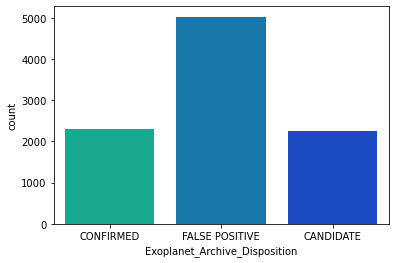

In [17]:
sns.countplot(df['Exoplanet_Archive_Disposition'],palette='winter_r')

#### Comments:

- This feature represents the category of a KOI from the Exoplanet Archive and it could be False Positive or Candidate or Confirmed.

##### Disposition_Using_KeplerData

In [18]:
df['Disposition_Using_KeplerData'].value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: Disposition_Using_KeplerData, dtype: int64

<AxesSubplot:xlabel='Disposition_Using_KeplerData', ylabel='count'>

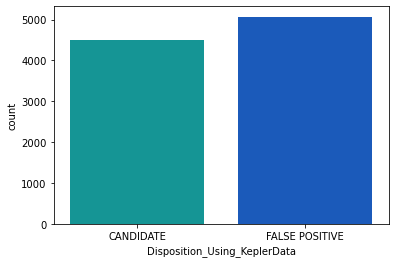

In [19]:
sns.countplot(df['Disposition_Using_KeplerData'],palette='winter_r')

#### Comments:

- This feature represents the disposition done by the analysis of Kepler data. And it could be either False Positive or Candidate.

###  For this project I am going to keep 'Disposition_Using_KeplerData' as the target variable. 
### The objective of the model will be to predict the likelihood of a KOI to be a Candidate exoplanet.
#### The ratio of the classes in the target seems to balanced so we can proceed with that.

###### Ploting the field view of kepler object of interest showing all the candidates and false positive class.

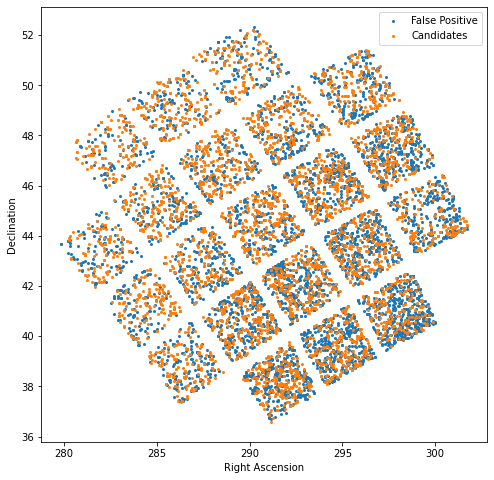

In [20]:
import matplotlib.pyplot as plt

Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']
FP = df[df.Disposition_Using_KeplerData == 'FALSE POSITIVE']

ra_f, dec_f = FP.RA_deg, FP.Dec_deg
ra_c, dec_c = Candidate.RA_deg, Candidate.Dec_deg

fig = plt.figure(figsize=(8,8))

plt.scatter(ra_f, dec_f, s=4, label='False Positive')
plt.scatter(ra_c, dec_c, s=4, label="Candidates")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

##### We will now explore a bit more about the features that contributes to disposition an exoplanet Candidates from the Kepler Data.

AS we know that Kepler's objective is to study the structure and diversity of the planetary system by using transit method.
So Now we will focus on the Transit properties to identify the exoplanets.

In [21]:
Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']

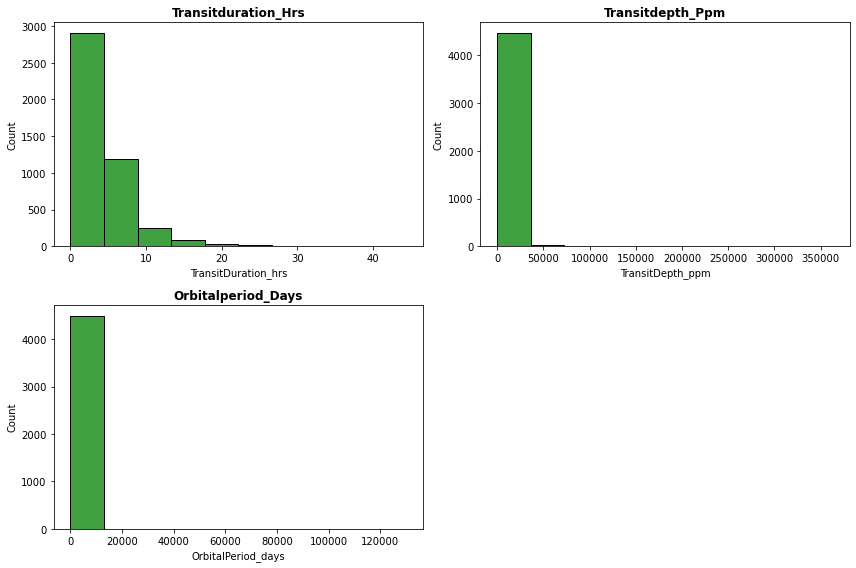

In [22]:
Transit_Properties1=['TransitDuration_hrs','TransitDepth_ppm','OrbitalPeriod_days']

target = [i for i in Transit_Properties1]
plt.figure(figsize=(12,8))
for n,i in enumerate(target):
    plot=plt.subplot(2,2,n+1)
    sns.histplot(Candidate[i],color='green',bins=10)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()


#### Comments:
 - The Transit duration for most of the candidates is less than 10 hours i.e. transit time is less which implies that possibility of the planet to be gravitationaly bound to it's host star.
 - For most of the candidate exoplanet the Transit depth is low which signifies low Stellar flux is lost during transit that implies the possibility of the planet to be closely rotating in an orbit to the host star.
 - Again Less orbital period signifies the candidate planet is at close proximity and is orbiting the host star.

<AxesSubplot:xlabel='TransitDepth_ppm', ylabel='TransitDuration_hrs'>

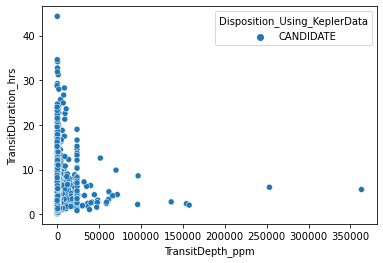

In [23]:
sns.scatterplot(df['TransitDepth_ppm'],df['TransitDuration_hrs'],hue=Candidate['Disposition_Using_KeplerData'])

- The above plot signifies that the objects that are dispositioned as Candidate have low TransitDeoth and TransitDuration.

#### Let us now prospect some attributes that contributed to confirm exoplanets in the Exoplanet_Archive_Disposition.

In [24]:
Confirmed = df[df.Exoplanet_Archive_Disposition == 'CONFIRMED']

<AxesSubplot:xlabel='EquilibriumTemperature_K', ylabel='Density'>

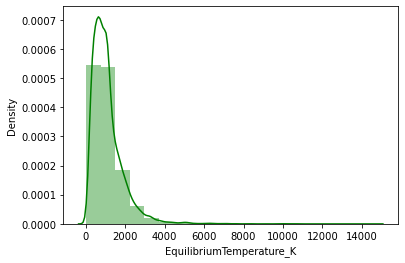

In [25]:
sns.distplot(df['EquilibriumTemperature_K'],color='green',bins=20)

<AxesSubplot:xlabel='TCE_PlanetNumber', ylabel='Count'>

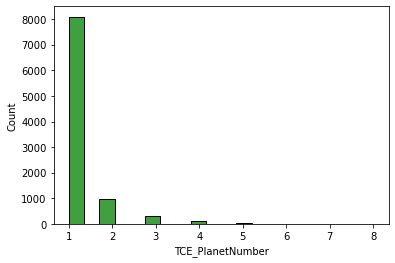

In [26]:
sns.histplot(df['TCE_PlanetNumber'],color='green',bins=20)

<AxesSubplot:xlabel='PlanetaryRadius_Earthradii'>

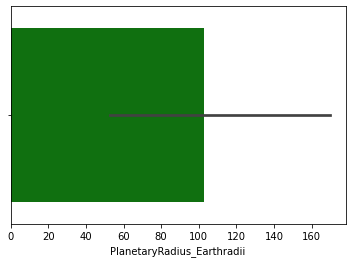

In [27]:
sns.barplot(df['PlanetaryRadius_Earthradii'],color='green')

In [28]:
df.columns

Index(['rowid', 'KepID', 'DispositionScore', 'NotTransit_LikeFPFlag',
       'StellarEclipse_FP_Flag', 'CentroidOffsetFPFlag',
       'EphemerisMatchIndicatesContaminationFPFlag', 'OrbitalPeriod_days',
       'OrbitalPeriodUpper_days', 'OrbitalPeriodLower_days',
       'TransitEpoch_BKJD', 'TransitEpoch_Lower', 'TransitEpoch_Upper',
       'ImpactParamete', 'ImpactParameter_Lower', 'ImpactParameter_Upper',
       'TransitDuration_hrs', 'TransitDuration_Lower', 'TransitDuration_Upper',
       'TransitDepth_ppm', 'TransitDepth_Lower', 'TransitDepth_Upper',
       'PlanetaryRadius_Earthradii', 'PlanetaryRadius_Lower',
       'PlanetaryRadius_Upper', 'EquilibriumTemperature_K',
       'InsolationFlux_Earthflux', 'InsolationFlux_Lower',
       'InsolationFlux_Upper', 'TransitSignal_to_Noise', 'TCE_PlanetNumber',
       'StellarEffectiveTemperature_K', 'StellarEffectiveTemp_Lower',
       'StellarEffectiveTemp_Upper', 'StellarSurfaceGravity',
       'Stellar_SurfaceGravity_Lower', 'Stellar_S

##### We are going to drop few more columns.

- 'rowid','KepID','KOIName', as these will not impact model performance.
-  'InsolationFlux_Earthflux','InsolationFlux_Lower','InsolationFlux_Upper', as it is another way to give the equilibrium temperature which is already present.
- 'StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper', as it's range is quite same for all the object.

In [29]:
#Removing the unnecessary features

df.drop(columns=['KepID','KOIName','InsolationFlux_Earthflux','InsolationFlux_Lower', 'InsolationFlux_Upper','StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper',],inplace=True)

In [30]:
df.shape

(9564, 38)

### Checking the correlation

In [31]:
df1=df[['DispositionScore','NotTransit_LikeFPFlag', 'StellarEclipse_FP_Flag',
       'CentroidOffsetFPFlag', 'EphemerisMatchIndicatesContaminationFPFlag',
       'OrbitalPeriod_days','TransitEpoch_BKJD','ImpactParamete','TransitDuration_hrs','PlanetaryRadius_Earthradii','EquilibriumTemperature_K',
       'TransitSignal_to_Noise', 'TCE_PlanetNumber','StellarEffectiveTemperature_K','StellarRadius_Solarradii',]]

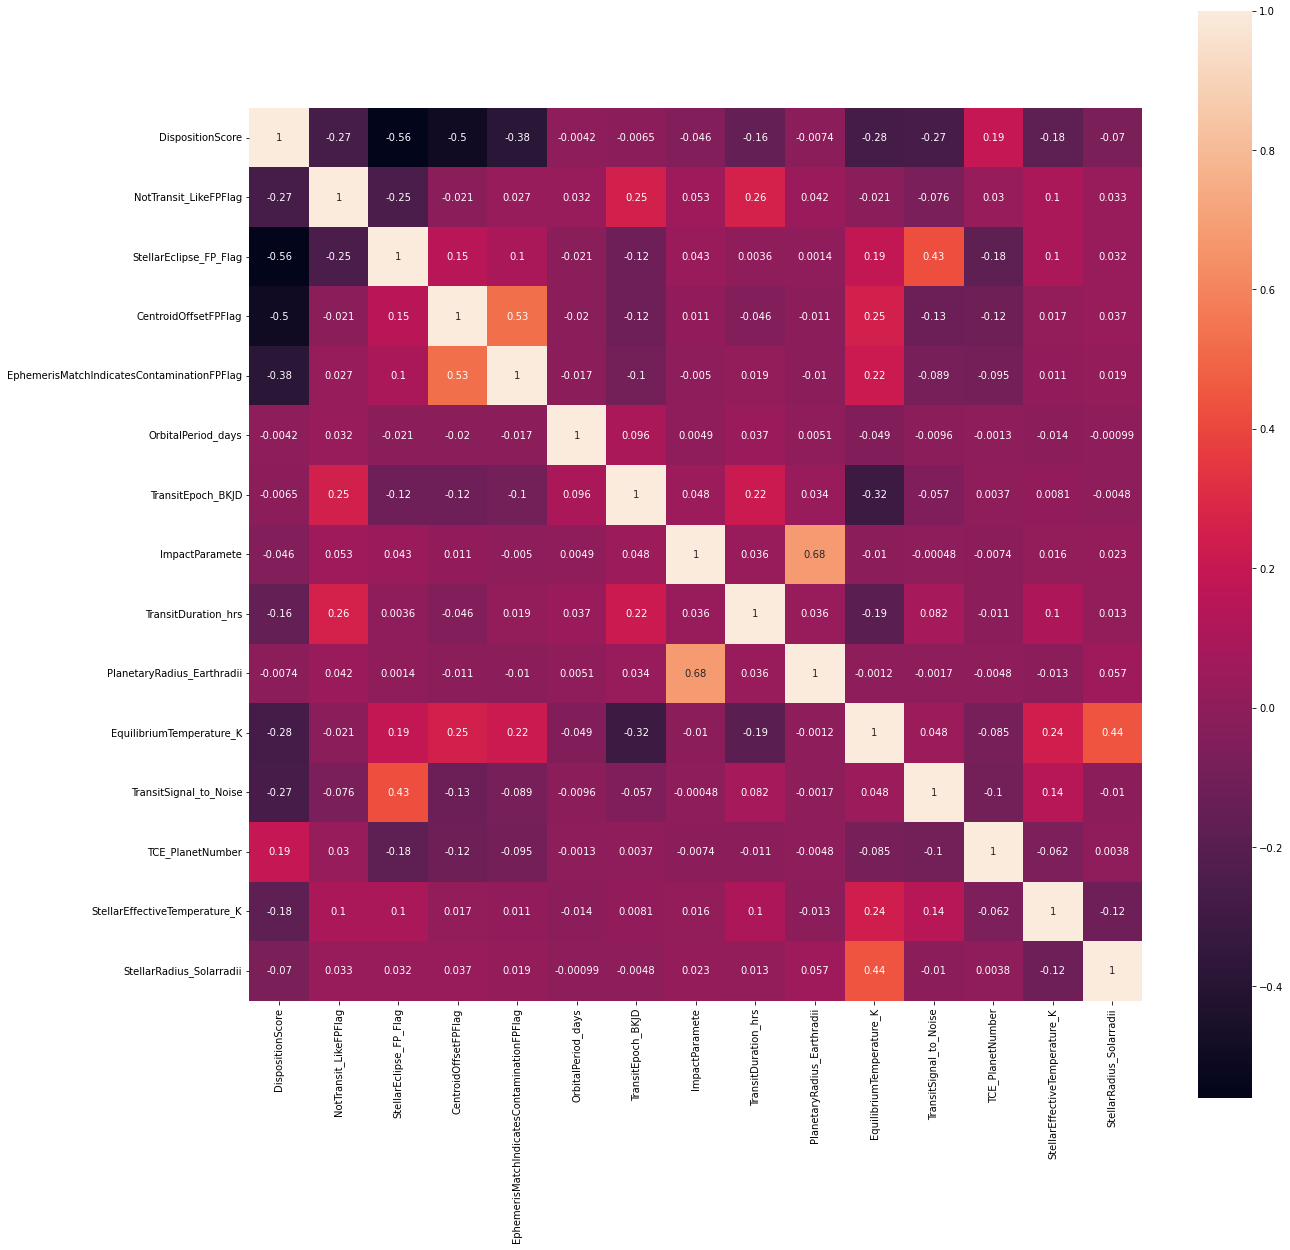

In [32]:
plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), square=True,annot=True)
plt.show()

#### Comments:
- We can drop 'EphemerisMatchIndicatesContaminationFPFlag' as it is corelated with 'CentroidOffsetFPFlag'. 
- The corelation between all other features is not so high and seems fine to proceed.


In [33]:
df=df.drop('EphemerisMatchIndicatesContaminationFPFlag',axis=1)

### Separating the Dependent and Independent Features

In [34]:
X=df.drop(['Disposition_Using_KeplerData'],axis=1)   

y=df['Disposition_Using_KeplerData']


### Encoding the Categorical Variables

In [35]:
X=pd.get_dummies(X,columns=['Exoplanet_Archive_Disposition'],drop_first=True)

### Encoding the target variable

In [36]:
y=y.apply(lambda x: 1 if x == 'CANDIDATE' else 0)

### Creating Train and Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((7651, 37), (1913, 37))

#### Scaling using Standard-Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Bulding Different Models

### Importing different Classification Algorithm

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

#### Doing it Together

In [42]:
regressors = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),
              ExtraTreeClassifier(),HistGradientBoostingClassifier(),XGBRFClassifier(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),CatBoostClassifier(),AdaBoostClassifier(),XGBClassifier(),lightgbm.LGBMClassifier()]
names = ['Logistic_Regression', 'DecisionTree', 'Random_Forest','Gaussian NB','ExtraTree', 'HistGradientBoosting','XGboostRF','catboost','adaboost','xgboost','LiGHtgbm']

In [43]:
model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(X_train, y_train)
    
    # accuracy
    score = reg.score(X_test, y_test)
    model_dict[name] = [accuracy_score(y_train, reg.predict(X_train)),accuracy_score(y_test, reg.predict(X_test)) ]

Learning rate set to 0.024563
0:	learn: 0.6260261	total: 202ms	remaining: 3m 21s
1:	learn: 0.5655097	total: 240ms	remaining: 1m 59s
2:	learn: 0.5121423	total: 268ms	remaining: 1m 29s
3:	learn: 0.4600267	total: 291ms	remaining: 1m 12s
4:	learn: 0.4103458	total: 330ms	remaining: 1m 5s
5:	learn: 0.3660631	total: 348ms	remaining: 57.7s
6:	learn: 0.3321626	total: 379ms	remaining: 53.8s
7:	learn: 0.2993347	total: 413ms	remaining: 51.2s
8:	learn: 0.2689821	total: 441ms	remaining: 48.6s
9:	learn: 0.2420136	total: 462ms	remaining: 45.8s
10:	learn: 0.2190815	total: 489ms	remaining: 44s
11:	learn: 0.1961436	total: 507ms	remaining: 41.8s
12:	learn: 0.1756427	total: 527ms	remaining: 40s
13:	learn: 0.1588198	total: 544ms	remaining: 38.3s
14:	learn: 0.1436668	total: 562ms	remaining: 36.9s
15:	learn: 0.1296996	total: 579ms	remaining: 35.6s
16:	learn: 0.1177775	total: 601ms	remaining: 34.8s
17:	learn: 0.1059884	total: 636ms	remaining: 34.7s
18:	learn: 0.0945863	total: 654ms	remaining: 33.7s
19:	learn: 

162:	learn: 0.0008006	total: 4.13s	remaining: 21.2s
163:	learn: 0.0007918	total: 4.15s	remaining: 21.2s
164:	learn: 0.0007785	total: 4.17s	remaining: 21.1s
165:	learn: 0.0007785	total: 4.2s	remaining: 21.1s
166:	learn: 0.0007711	total: 4.21s	remaining: 21s
167:	learn: 0.0007605	total: 4.24s	remaining: 21s
168:	learn: 0.0007551	total: 4.26s	remaining: 21s
169:	learn: 0.0007446	total: 4.28s	remaining: 20.9s
170:	learn: 0.0007406	total: 4.31s	remaining: 20.9s
171:	learn: 0.0007346	total: 4.34s	remaining: 20.9s
172:	learn: 0.0007289	total: 4.36s	remaining: 20.8s
173:	learn: 0.0007247	total: 4.38s	remaining: 20.8s
174:	learn: 0.0007139	total: 4.42s	remaining: 20.9s
175:	learn: 0.0007098	total: 4.47s	remaining: 20.9s
176:	learn: 0.0007037	total: 4.5s	remaining: 20.9s
177:	learn: 0.0006993	total: 4.55s	remaining: 21s
178:	learn: 0.0006993	total: 4.58s	remaining: 21s
179:	learn: 0.0006920	total: 4.62s	remaining: 21.1s
180:	learn: 0.0006807	total: 4.65s	remaining: 21s
181:	learn: 0.0006714	tota

325:	learn: 0.0004343	total: 7.84s	remaining: 16.2s
326:	learn: 0.0004343	total: 7.89s	remaining: 16.2s
327:	learn: 0.0004343	total: 7.92s	remaining: 16.2s
328:	learn: 0.0004343	total: 7.95s	remaining: 16.2s
329:	learn: 0.0004343	total: 7.99s	remaining: 16.2s
330:	learn: 0.0004343	total: 8.03s	remaining: 16.2s
331:	learn: 0.0004343	total: 8.06s	remaining: 16.2s
332:	learn: 0.0004343	total: 8.1s	remaining: 16.2s
333:	learn: 0.0004343	total: 8.12s	remaining: 16.2s
334:	learn: 0.0004343	total: 8.13s	remaining: 16.1s
335:	learn: 0.0004342	total: 8.15s	remaining: 16.1s
336:	learn: 0.0004342	total: 8.17s	remaining: 16.1s
337:	learn: 0.0004342	total: 8.19s	remaining: 16s
338:	learn: 0.0004342	total: 8.21s	remaining: 16s
339:	learn: 0.0004342	total: 8.22s	remaining: 16s
340:	learn: 0.0004342	total: 8.24s	remaining: 15.9s
341:	learn: 0.0004342	total: 8.27s	remaining: 15.9s
342:	learn: 0.0004342	total: 8.29s	remaining: 15.9s
343:	learn: 0.0004342	total: 8.3s	remaining: 15.8s
344:	learn: 0.000434

491:	learn: 0.0004143	total: 11.8s	remaining: 12.2s
492:	learn: 0.0004143	total: 11.9s	remaining: 12.2s
493:	learn: 0.0004143	total: 11.9s	remaining: 12.2s
494:	learn: 0.0004143	total: 11.9s	remaining: 12.1s
495:	learn: 0.0004143	total: 11.9s	remaining: 12.1s
496:	learn: 0.0004143	total: 11.9s	remaining: 12.1s
497:	learn: 0.0004143	total: 12s	remaining: 12.1s
498:	learn: 0.0004143	total: 12s	remaining: 12s
499:	learn: 0.0004143	total: 12s	remaining: 12s
500:	learn: 0.0004143	total: 12s	remaining: 12s
501:	learn: 0.0004143	total: 12s	remaining: 11.9s
502:	learn: 0.0004143	total: 12.1s	remaining: 11.9s
503:	learn: 0.0004143	total: 12.1s	remaining: 11.9s
504:	learn: 0.0004143	total: 12.1s	remaining: 11.9s
505:	learn: 0.0004142	total: 12.1s	remaining: 11.8s
506:	learn: 0.0004142	total: 12.1s	remaining: 11.8s
507:	learn: 0.0004142	total: 12.1s	remaining: 11.8s
508:	learn: 0.0004142	total: 12.2s	remaining: 11.7s
509:	learn: 0.0004142	total: 12.2s	remaining: 11.7s
510:	learn: 0.0004142	total:

657:	learn: 0.0004139	total: 14.9s	remaining: 7.75s
658:	learn: 0.0004139	total: 14.9s	remaining: 7.73s
659:	learn: 0.0004139	total: 15s	remaining: 7.7s
660:	learn: 0.0004139	total: 15s	remaining: 7.68s
661:	learn: 0.0004139	total: 15s	remaining: 7.65s
662:	learn: 0.0004139	total: 15s	remaining: 7.63s
663:	learn: 0.0004139	total: 15s	remaining: 7.6s
664:	learn: 0.0004139	total: 15s	remaining: 7.58s
665:	learn: 0.0004139	total: 15.1s	remaining: 7.55s
666:	learn: 0.0004139	total: 15.1s	remaining: 7.54s
667:	learn: 0.0004139	total: 15.1s	remaining: 7.51s
668:	learn: 0.0004139	total: 15.1s	remaining: 7.49s
669:	learn: 0.0004139	total: 15.2s	remaining: 7.46s
670:	learn: 0.0004139	total: 15.2s	remaining: 7.44s
671:	learn: 0.0004139	total: 15.2s	remaining: 7.42s
672:	learn: 0.0004139	total: 15.2s	remaining: 7.39s
673:	learn: 0.0004139	total: 15.2s	remaining: 7.37s
674:	learn: 0.0004139	total: 15.2s	remaining: 7.34s
675:	learn: 0.0004139	total: 15.3s	remaining: 7.31s
676:	learn: 0.0004139	tota

819:	learn: 0.0004137	total: 18s	remaining: 3.96s
820:	learn: 0.0004137	total: 18.1s	remaining: 3.94s
821:	learn: 0.0004137	total: 18.1s	remaining: 3.92s
822:	learn: 0.0004137	total: 18.1s	remaining: 3.89s
823:	learn: 0.0004137	total: 18.1s	remaining: 3.87s
824:	learn: 0.0004137	total: 18.1s	remaining: 3.85s
825:	learn: 0.0004136	total: 18.1s	remaining: 3.82s
826:	learn: 0.0004137	total: 18.2s	remaining: 3.8s
827:	learn: 0.0004136	total: 18.2s	remaining: 3.78s
828:	learn: 0.0004136	total: 18.2s	remaining: 3.75s
829:	learn: 0.0004136	total: 18.2s	remaining: 3.73s
830:	learn: 0.0004136	total: 18.2s	remaining: 3.71s
831:	learn: 0.0004136	total: 18.3s	remaining: 3.69s
832:	learn: 0.0004136	total: 18.3s	remaining: 3.66s
833:	learn: 0.0004136	total: 18.3s	remaining: 3.64s
834:	learn: 0.0004136	total: 18.3s	remaining: 3.62s
835:	learn: 0.0004136	total: 18.3s	remaining: 3.6s
836:	learn: 0.0004136	total: 18.3s	remaining: 3.57s
837:	learn: 0.0004136	total: 18.4s	remaining: 3.55s
838:	learn: 0.00

980:	learn: 0.0004129	total: 21.2s	remaining: 410ms
981:	learn: 0.0004129	total: 21.2s	remaining: 389ms
982:	learn: 0.0004129	total: 21.2s	remaining: 367ms
983:	learn: 0.0004129	total: 21.2s	remaining: 345ms
984:	learn: 0.0004129	total: 21.3s	remaining: 324ms
985:	learn: 0.0004129	total: 21.3s	remaining: 302ms
986:	learn: 0.0004129	total: 21.3s	remaining: 281ms
987:	learn: 0.0004129	total: 21.3s	remaining: 259ms
988:	learn: 0.0004129	total: 21.3s	remaining: 237ms
989:	learn: 0.0004129	total: 21.4s	remaining: 216ms
990:	learn: 0.0004129	total: 21.4s	remaining: 194ms
991:	learn: 0.0004129	total: 21.4s	remaining: 173ms
992:	learn: 0.0004129	total: 21.4s	remaining: 151ms
993:	learn: 0.0004128	total: 21.4s	remaining: 129ms
994:	learn: 0.0004128	total: 21.5s	remaining: 108ms
995:	learn: 0.0004128	total: 21.5s	remaining: 86.3ms
996:	learn: 0.0004128	total: 21.5s	remaining: 64.7ms
997:	learn: 0.0004128	total: 21.5s	remaining: 43.1ms
998:	learn: 0.0004128	total: 21.5s	remaining: 21.6ms
999:	lea

In [44]:
model_df = pd.DataFrame(model_dict, index = ["Training Accuracy","Testing Accuracy"]).T
model_df= model_df.sort_values(by=["Training Accuracy","Testing Accuracy"], ascending=False)
model_df

,Training Accuracy,Testing Accuracy
DecisionTree,1.000000,0.999477
Random_Forest,1.000000,0.999477
HistGradientBoosting,1.000000,0.999477
catboost,1.000000,0.999477
adaboost,1.000000,0.999477
LiGHtgbm,1.000000,0.999477
xgboost,1.000000,0.998955
ExtraTree,1.000000,0.998432
Logistic_Regression,0.999869,0.999477
XGboostRF,0.999869,0.998432


####  Although every Classifier is performing upto the mark with significant accuracy. so let's inspect Random forest a bit deeper with cross validation.

## RandomForestClassifier

In [45]:
rmf=RandomForestClassifier()

# Train Model
rmf.fit(X_train,y_train)

# Training set performance
train_accuracy= rmf.score(X_train,y_train)

#Testing set performance
test_accuracy=rmf.score(X_test,y_test)
y_pred=rmf.predict(X_test)


print('Accuracy for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('Accuracy for Testing set is')
print( 100*test_accuracy)
print('----------------------------------')
print('\n The Classification Report is as below\n')
print(classification_report(y_test,y_pred))


Accuracy for Training set is
100.0
----------------------------------
Accuracy for Testing set is
99.94772608468374
----------------------------------

 The Classification Report is as below

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



#### Comments:

- I got good accuracy with default parameters so I did not tried for any hyperparameter tuning.
- The precision and recall is also 1 which shows our model is quite accurate to predict the candidate exoplanet.

#### Cross-Validating the model

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rmf,X_train,y_train,cv=5,scoring='accuracy')

print('The accuracy scores are \n',scores)
print('\n\n The Average Accuracy of RandomForest Classifier is\n',scores.mean())

The accuracy scores are 
 [0.9980405  0.99869281 0.99934641 1.         1.        ]


 The Average Accuracy of RandomForest Classifier is
 0.9992159424187703


#### The Confustion Matrix

<AxesSubplot:>

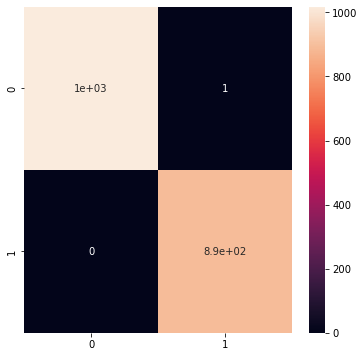

In [47]:
cm = confusion_matrix(y_test,y_pred)

plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

#### Comments:
- The value of False-positive is 2 which implies that the model has categoriesed only 2 KOI as candidate but in actual they are disposition as false positive exoplanet.

#### The ROC Curve

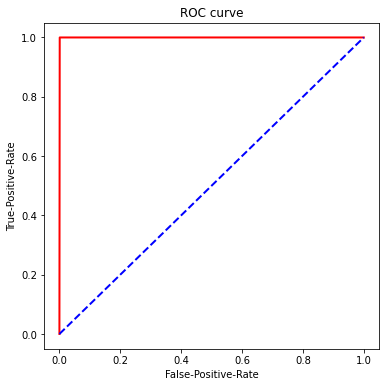

In [48]:
fpr, tpr,_= roc_curve(y_test,y_pred, drop_intermediate=False)

plt.figure()
# Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
# Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
# Title and label
# Title and label
plt.xlabel('False-Positive-Rate')
plt.ylabel('True-Positive-Rate')
plt.title('ROC curve')
plt.show()

#### Comments:
- The area under the Roc curve is maximum which signfies the model is a good separator/classifier. 

- Carl sagan quoted that "Somewhere Something incredible is waiting to be known" and we are on it. NASA's Exoplanet Exploration Program (ExEP) is running to detect and study more planetary systems and more than 5000 exoplanets are already been confirmed till date. And the hunt for exoplanet will go on  until the humanity find another blue dot because indeed "The Universe is a pretty big place and if it's just us, seems like an awful waste of space"